In [43]:
import pandas as pd
#Importação das bases de dados da web
url_ocorrencias = 'https://dedalo.sti.fab.mil.br/dadosabertos/ocorrencia.csv'
url_tipo_ocorrencia = 'https://dedalo.sti.fab.mil.br/dadosabertos/ocorrencia_tipo.csv'
url_aeronaves = 'https://dedalo.sti.fab.mil.br/dadosabertos/aeronave.csv'
url_fator_contribuinte = 'https://dedalo.sti.fab.mil.br/dadosabertos/fator_contribuinte.csv'

#leitura das bases de dados 
ocorrencias_df = pd.read_csv(url_ocorrencias,sep= ';', encoding='latin-1')
tipo_df = pd.read_csv(url_tipo_ocorrencia, sep=';', encoding='latin-1')
aeronaves_df = pd.read_csv(url_aeronaves, sep= ';', encoding='latin-1')
fator_df = pd.read_csv(url_fator_contribuinte, sep=';', encoding='latin-1')

display(aeronaves_df)

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,87125,PSAEX,***,AVIÃO,EMBRAER,ERJ 190-400,E295,NaN,***,61200.0,...,BRASIL,BRASIL,AVIÃO,***,VIRACOPOS,ORLANDO BEZERRA DE MENEZES,DESCIDA,REGULAR,NENHUM,0.0
1,87124,PRYXD,***,AVIÃO,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-72-212A (600),AT76,***,***,23000.0,...,BRASIL,BRASIL,AVIÃO,***,TENENTE-CORONEL AVIADOR CÉSAR BOMBONATO,TANCREDO NEVES,SUBIDA,REGULAR,NENHUM,0.0
2,87123,PRXBT,***,***,AIRBUS S.A.S.,A320-271N,A20N,NaN,BIMOTOR,79000.0,...,BRASIL,BRASIL,***,***,GOVERNADOR ANDRÉ FRANCO MONTORO,PINTO MARTINS,DECOLAGEM,REGULAR,NENHUM,0.0
3,87122,PRAKJ,***,AVIÃO,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-72-212A (600),AT76,TURBOÉLICE,BIMOTOR,22000.0,...,BRASIL,BRASIL,AVIÃO,***,SANTA MARIA,VIRACOPOS,DECOLAGEM,REGULAR,NENHUM,0.0
4,87121,PRMHK,***,AVIÃO,AIRBUS,A320-214,A320,JATO,BIMOTOR,77000.0,...,BRASIL,BRASIL,AVIÃO,***,PROFESSOR ERIBERTO MANOEL REINO,GOVERNADOR ANDRÉ FRANCO MONTORO,DECOLAGEM,REGULAR,LEVE,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13296,28377,PTDOJ,***,AVIÃO,CESSNA AIRCRAFT,182N,C182,PISTÃO,MONOMOTOR,1338.0,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,PREFEITO RENATO MOREIRA,COMANDANTE CARLOS INÁCIO AGNES,INDETERMINADA,PRIVADA,DESTRUÍDA,3.0
13297,28375,PRMMS,***,AVIÃO,RAYTHEON AIRCRAFT,400A,BE40,JATO,BIMOTOR,7318.0,...,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,CAPITÃO JOÃO BUSSE,CONGONHAS,DECOLAGEM,TÁXI AÉREO,LEVE,0.0
13298,28355,PTAFV,***,AVIÃO,BEECH AIRCRAFT,95-C55,BE55,PISTÃO,BIMOTOR,2404.0,...,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,CARLOS DRUMMOND DE ANDRADE / PAMPULHA,MÁRIO RIBEIRO,INDETERMINADA,TÁXI AÉREO,DESTRUÍDA,2.0
13299,28335,PRJCR,***,AVIÃO,BEECH AIRCRAFT,A36,BE36,PISTÃO,MONOMOTOR,1633.0,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,PROFESSOR ERIBERTO MANOEL REINO,GOVERNADOR JOSÉ RICHA,APROXIMAÇÃO FINAL,PRIVADA,DESTRUÍDA,2.0


## Tarefa 1: Análise Temporal e Geográfica

### 1. Mês mais perigoso: Calcule e plote um gráfico de barras que mostre o total de ocorrências por mês do ano. Identifique o mês com o maior número de ocorrências.

Locale definido para 'Portuguese_Brazil'.
O mês com maior número de acidentes é: janeiro


(<Axes: title={'center': 'Ocorrencia de acidentes por mês'}, xlabel='Meses', ylabel='Quantidade'>,
 None)

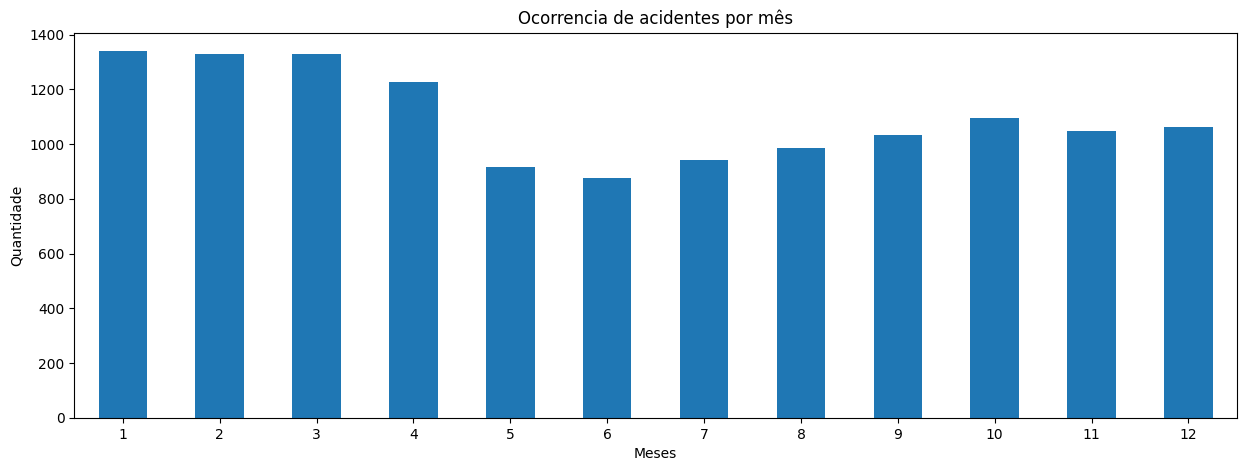

In [38]:
import locale
try:
    locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil')
    print("Locale definido para 'Portuguese_Brazil'.")
except locale.Error:
    print("Locale 'Portuguese_Brazil' não encontrado. Tentando 'pt_BR.utf8'...")
ocorrencias_df['ocorrencia_dia'] = pd.to_datetime(ocorrencias_df['ocorrencia_dia'],format = '%d/%m/%Y')
from datetime import date
def mes_mais_perigoso(df):
    combinado_df = df[['ocorrencia_dia']]
    combinado_df = combinado_df.groupby(combinado_df['ocorrencia_dia'].dt.month)['ocorrencia_dia'].count()
    mes = combinado_df.idxmax()
    nome_mes = date(2000,mes,1)
    mes_portugues = nome_mes.strftime('%B')
    return combinado_df.plot(figsize=[15,5], kind='bar', title='Ocorrencia de acidentes por mês', xlabel='Meses', ylabel='Quantidade', rot=0), print(f'O mês com maior número de acidentes é: {mes_portugues}')


mes_mais_perigoso(ocorrencias_df)

### 2. Top 5 estados: Liste os 5 estados brasileiros com o maior número de ocorrências registradas.

ocorrencia_uf
SP    3283
RJ    1277
MG    1077
PR     917
RS     733
Name: count, dtype: int64

(<Axes: xlabel='Estados', ylabel='Quantidade de acidentes'>, None)

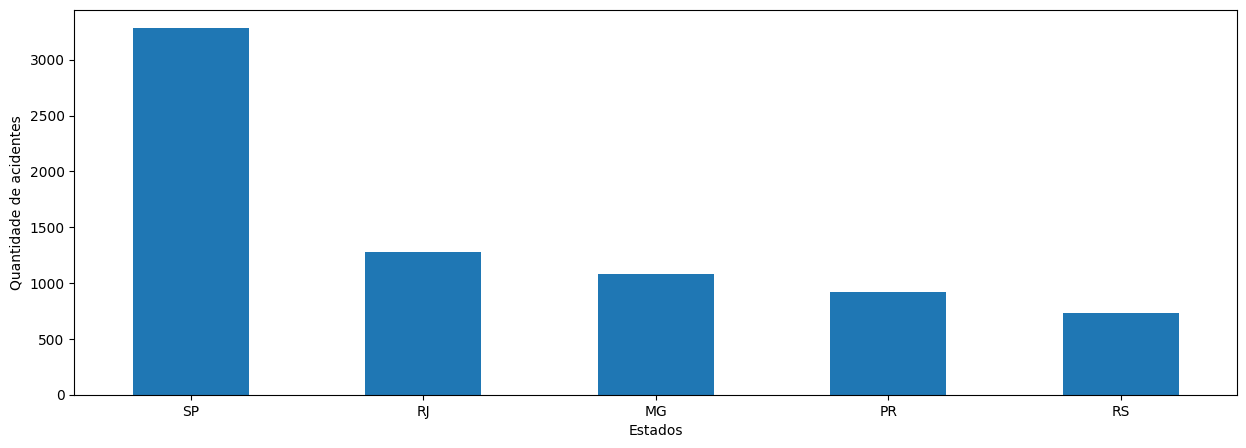

In [39]:
def top_5(df):
    combinado_df = df['ocorrencia_uf'].value_counts()
    return combinado_df[:5].plot(figsize=[15, 5], kind='bar', rot=0, xlabel= 'Estados', ylabel='Quantidade de acidentes'), display(combinado_df[:5])

top_5(ocorrencias_df)

### 3. Tendência anual: Plote um gráfico de linhas mostrando a evolução do número total de ocorrências ao longo dos anos.

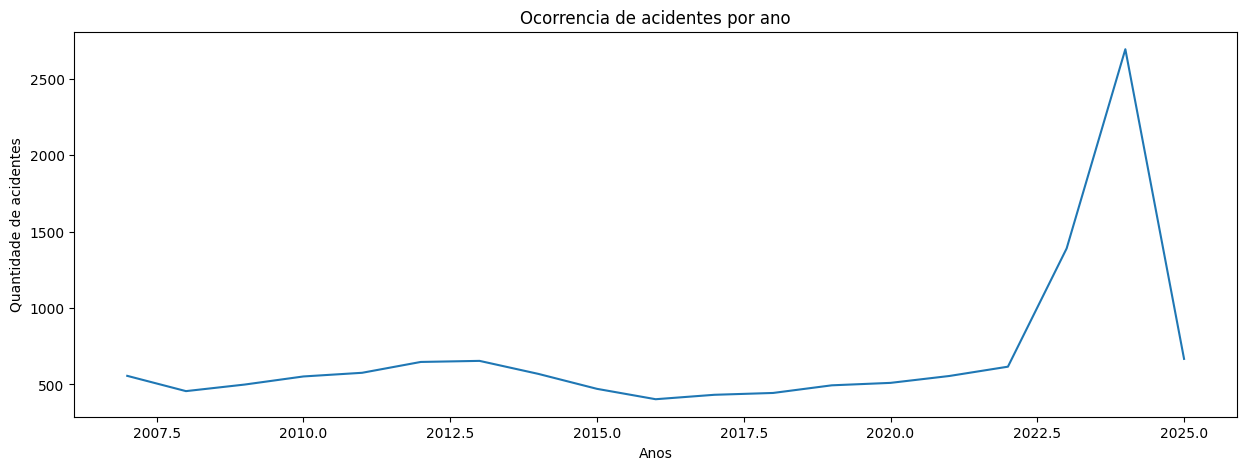

In [42]:
def evolucao_ocorrencias_ano(df):
    combinado_df = df.groupby(df['ocorrencia_dia'].dt.year)['ocorrencia_dia'].count()
    combinado_df.plot(figsize=[15, 5], rot=0, xlabel='Anos', ylabel='Quantidade de acidentes', title='Ocorrencia de acidentes por ano')

evolucao_ocorrencias_ano(ocorrencias_df)    

## Tarefa 2: Análise da Ocorrência e Aeronave

### 1. Tipos de aeronave: Qual o tipo de veículo (aeronave_tipo_veiculo) mais envolvido em ocorrências classificadas como ACIDENTE? (Dica: Você precisará juntar as bases de dados de ocorrência e aeronave).

aeronave_tipo_veiculo
AVIÃO          2115
HELICÓPTERO     351
ULTRALEVE       291
***              58
PLANADOR         21
ANFÍBIO           8
TRIKE             5
GIROCÓPTERO       4
DRONE             1
DIRIGÍVEL         1
HIDROAVIÃO        1
BALÃO             1
Name: count, dtype: int64

(<Axes: title={'center': 'Tipos de aeronaves envolvidas em ACIDENTES'}, xlabel='Tiupos de aeronaves', ylabel='Quantidade de acidentes'>,
 None)

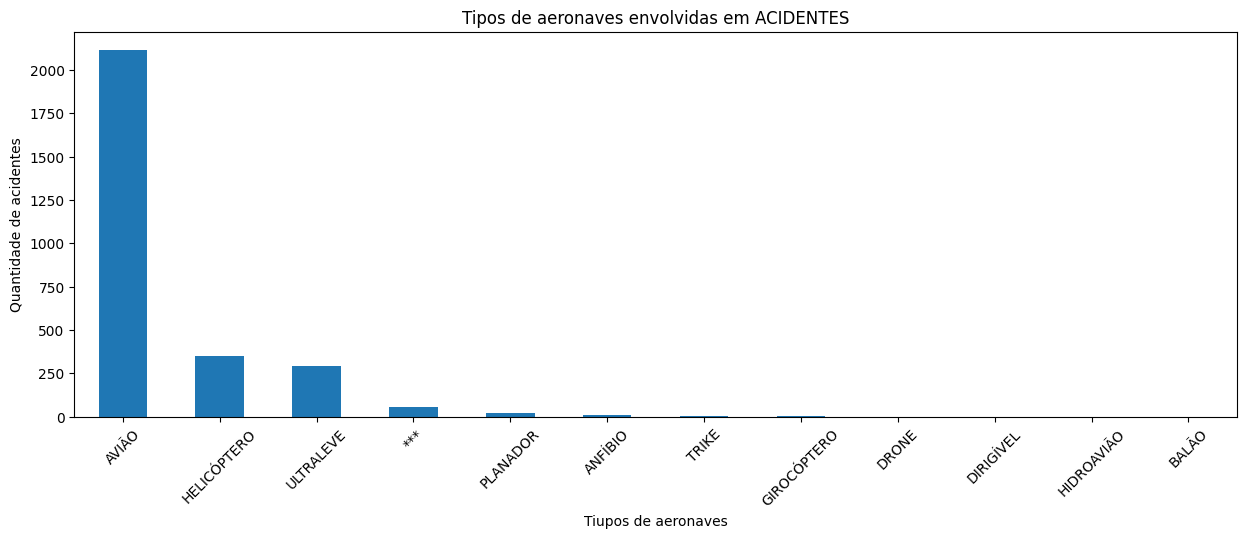

In [63]:
def aeronaves_acidentes():
    combinado_df = ocorrencias_df.merge(aeronaves_df, on='codigo_ocorrencia2')
    combinado_df = combinado_df[['ocorrencia_classificacao', 'aeronave_tipo_veiculo']]
    combinado_df = combinado_df[combinado_df['ocorrencia_classificacao'] == 'ACIDENTE']
    combinado_df = combinado_df['aeronave_tipo_veiculo'].value_counts()
    return combinado_df.plot(figsize=[15, 5],kind='bar', title='Tipos de aeronaves envolvidas em ACIDENTES', xlabel='Tiupos de aeronaves', ylabel='Quantidade de acidentes', rot=45), display(combinado_df)

aeronaves_acidentes()